<a href="https://colab.research.google.com/github/tomersmadja/fake-news-detector/blob/main/Fake_news_detection_project_by_Gil_and_Tomer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Fake news detection**

---
## About the project

The evolution of social media created a new era in which information travels and spreading faster than ever. While in the newspaper era it took a lot of effort and resources to spread the word widely, nowadays, sharing news and information became ridiculously easy. In a manner of seconds, you can lunch a news item that will be distributed to hundreds of millions of people around the world.

The advantages of this new social age are significant and easy to spot, however, as Spiderman has been told - "with great power comes great responsibility.", and how bad it is that EVERYONE holds this great power? Well, it's it can be very bad!

Printed news is supervised by owners, editors, and censorship which makes it accurate and reliable. This reliability comes with a price as probably expected. At the end of the day, the owners and the editors decide which new are published, and it might put expression freedom of the journalists, and the right to know of the readers in jeopardize.
In our social media are there are no such limitations, anyone can be the publisher, the reader, or both any time they want. Yes, this freedom is priceless but looks like we pay a higher price than we expected for this freedom.

Fake news is spreading fast, and they are harmful, for example, in the early days of the COVID-19 pandemic, a rumor was spread about a magic cure for COVID-19. All the patient needs to do is to drink a small cup of bleach (Akonomika - the Israeli brand). Bleach has a great sanitizing ability and it's effective against COVID-19. This was adopted formally by countries like Bolivia and Peru. Donald Trump, the president of the USA in those days, even suggested injecting bleach and similar formula as a cure.

Sounds stupid right? you might think how anyone would buy this story and try this method, well, let's explain how.

>*Fake news and rumors thrive online because few verify what's real and always bias towards content that reinforces their own biases.*   ***Ryan Higa***

Nothing explains better why fake news spreads like a wildfire than this quote above. 
It suggests that not only that we are too lazy to have decent research and verify the reliability of the news we consume, but our mind also plays a critical part in this fake-news spreading phenomenon, we are subconsciously biased and often poorly distinguish between real and fake news.


So, the answer is yes, fake news is a big deal, but don't worry, we'll try to help.

As mentioned above, our mind has a hard time distinguishing between real and fake news, so, what will be better if we'll harness data science to help us with that? Correct! it doesn't get any better than that :)


**In this project, we'll attempt to predict fake news.**

Now it's obvious that clearing the internet form fake news is a war worth fighting. So without further ado, let's start to save the world and prevent fake news from being eared...

---
## Before we do anything...
The following are the basic imports and configuration we'll use in our project.
Along the wat the'll be more that will serve specific goals, we'll import them when we'll need them.

In [ ]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib

In [ ]:
# Changing the default figure size
matplotlib.rcParams['figure.figsize'] = [14, 10]
print("Default figure size is " + str(matplotlib.rcParams['figure.figsize']))

# matplotlib.pyplot will be the module we'll use the most so let's save it for quick access...
plt = matplotlib.pyplot

Default figure size is [14.0, 10.0]


---
## The data we are using

As mentioned above, the social media area made it much easier to create and publish a news item to the world. As it's so easy, fake news is produced non-stop every day.

We'll use a dataset from https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset. It contains nearly 45,000 news items that are dated and classified into categories.


### Importing the data
We'll import the data directly from www.kaggle.com using Kaggle API

In [ ]:
# Installing kaggle inorder to load the data
!pip install -q kaggle
!mkdir -p /root/.kaggle

!mv kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

Up to here is the preparations stage, now let's download the file, and unzip it.

In [ ]:
## download and unzip the file
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset
!unzip -o fake-and-real-news-dataset.zip

## removing zip file as it's not relevant anymore
!rm fake-and-real-news-dataset.zip

! du -h Fake.csv 
! du -h True.csv 

 90% 37.0M/41.0M [00:00<00:00, 176MB/s]
100% 41.0M/41.0M [00:00<00:00, 163MB/s]
Archive:  fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                
60M	Fake.csv
52M	True.csv


As you can see, now we have 2 CSV files: 


1.   Fake news - 60 MB of data
2.   Reals news - 52 MB of data
Let's load those CSV into seperated dataframes

In [ ]:
true = pd.read_csv("True.csv")
fake = pd.read_csv("Fake.csv")

### Labeling and basic manipulation
We would like to have the data concated, means all the news in one united dataframe. Pandas allows us to do it easily, however, before we do so, in-order to distinguish between fake news and real news, we'll label the data first.

*Needless to say, 1 represents True and 0 represents False*

In [ ]:
true['label'] = 1
fake['label'] = 0

In [ ]:
data = pd.concat([true, fake])
data.shape


(44898, 5)

We have in total 44,898 news items and 5 columns - it's a lot of data to work with and it's great.

Our columns are

In [ ]:
data.columns.to_list()

['title', 'text', 'subject', 'date', 'label']

In [ ]:
data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


---
## Exploratory Data Analysis (EDA)

**The motivation:**

The main purpose of EDA is to help look at data before making any assumptions.
It means that before we run into conclusions and decides which solutions might fit to our need, first we need to know our data closly.

You can’t draw reliable conclusions from a massive quantity of data by just gleancing over it, getting a "general feel" is often not enough. 
It's important to emphesize that the EDA stage is not just "a preparation to the real thing" but a crucial part of the entire process. Sometimes a good EDA can complete the job almost by itself, and genrally speaking, a good EDA often leads you to the select the appropriate predictive model you are seeking.


So after getting the right motivation for this stage, let's set some goals that want to acheive by the end of the stage.

**This stage will help us to...**
1.   Identify and avoid obvious errors
2.   Find interesting relations among the variables.
3.   Find and undestand patterns and trends within the data.

*(Durring the progress in this stage we suppose to achieve them all, so let's keep them in mind and keep track with the progress)*

### Cleaning the data


We want to have a dataframe with cleaned data, it will allow whatever model we'll choose to be more precise as it will take into considiration real-data without ant "background noises.

#### Cleaning `NaN` values
A good start will be to avoid any `null` values in our data.
So let's check if there are any...

In [ ]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

Great, we have no null values.

#### Cleaning new from invalid date

Let's try to sort the data by date to see what it looks like.

In [ ]:
data.sort_values('date')

,title,text,subject,date,label
9084,JUST IN: CROOKED DOJ OFFICIAL Didn’t Reveal Th...,We ve been covering the curious case of DOJ of...,politics,14-Feb-18,0
9083,The DIRTY TRUTH About DACA Recipients…Where Th...,"Yesterday, a second U.S. judge on Tuesday bloc...",politics,15-Feb-18,0
9082,HUH? RAPPER JAY-Z Compares Trayvon Martin to M...,Rapper Jay-Z attended the Peace Walk & Peace T...,politics,15-Feb-18,0
9081,SC STATE REP Who is a Former Cop Proposes Smar...,WHO BETTER THAN A FORMER POLICE OFFICER TO UND...,politics,15-Feb-18,0
9080,JUST IN: Senate Rejects Immigration Bill…Trump...,How could the Senate be so lame in their effor...,politics,15-Feb-18,0
...,...,...,...,...,...
21870,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,0
17433,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,0
21869,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,0
15839,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,0


This quick operation revealed some problems:


1.   We have some rows that are not realy news item, but some unknow url.
2.   We have rows with invalid date (not in any exaptable date format).
3.   The there are rows that are in a valid date formats but it doesn't match the rest of the rows date format

We obviously want to fix it.

So first of, all we'll write a function get's a string that represents date and returns the parsed date, and if it fails to parse it (for whatever reason, for example, the string is not in exceptable date format) it returns `null` instead.




In [ ]:
from dateutil.parser import parse
import datetime
def try_to_parse(d):
  try:
    return parse(d.strip())
  except:
    return None

Now le's apply our function on our date column

In [ ]:
data['date_parsed'] = data['date'].apply(lambda x: try_to_parse(x))

As you can see, so of the date we couldn't parse - as expected...

In [ ]:
data[data['date_parsed'].isna()]

,title,text,subject,date,label,date_parsed
9358,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,0,NaT
15507,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,0,NaT
15508,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,0,NaT
15839,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,0,NaT
15840,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,0,NaT
17432,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,0,NaT
17433,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,0,NaT
18933,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...,0,NaT
21869,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,0,NaT
21870,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,0,NaT


Actually we got "2 birds in one shot" as not only the date is parsed incorrectly but also the text and the titles are not real for those lines, so we can safely clean them out.

In [ ]:
data_clean = data[data['date_parsed'].notna()]

Finally, we can get rid of the original date column that was a bit messy.

In [ ]:
data_clean = data_clean.drop(["date"], axis=1)

#### Cleaning too short news 

Some of the rows have low number of words. Those are expected to be garbage text due to the lack of information so we don't reffer them as news. 

Let's see an histogram of the words count in each row

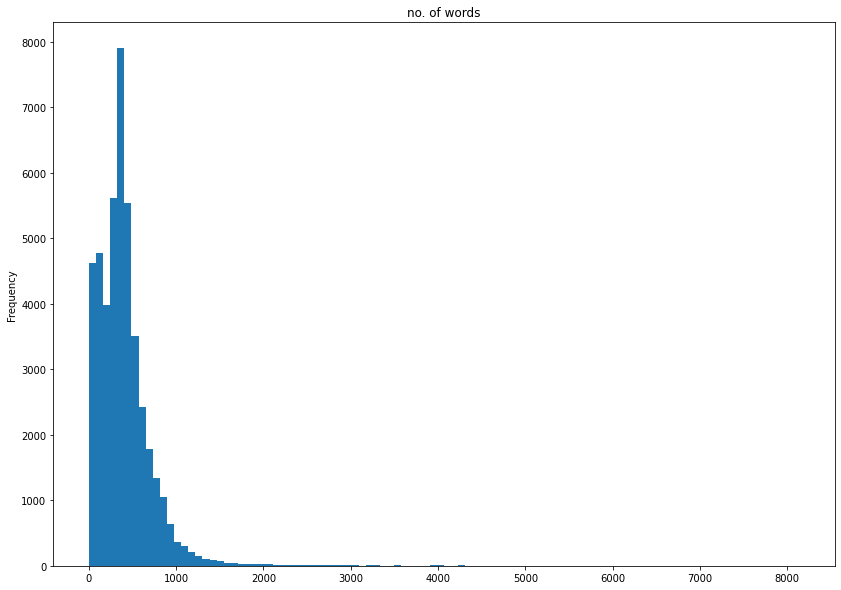

In [ ]:
wc=data_clean.text.str.split().str.len()
wc.plot(kind='hist', title='no. of words', bins=100)

Let's try to zoom in a little bit to get a better view.

We'll look only at new with less than 25 words, a.k.a "sort news"

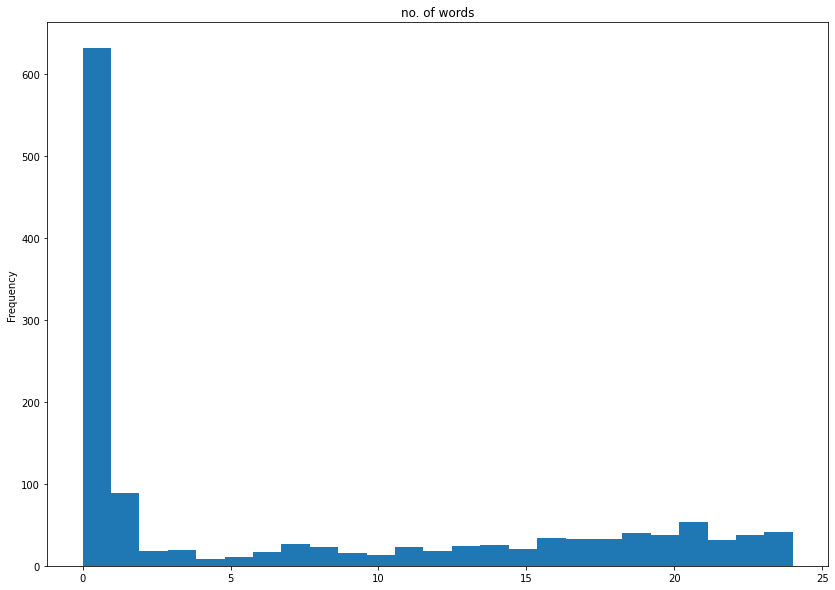

In [ ]:
short_news = wc[wc<25]
short_news.plot(kind='hist', title='no. of words', bins=25)

It's easy to see that we have aroung 650 news with no empty text, and nearly 100 whith 1 word only. Those rows are obviously meaningless and we need to clean them up. The more interesting question is how to set the threshold for "too short text" ?

The answer is we need to explore this small subset a bit more to determine, however, this subset is a negligible amount of rows so we can go ahead and set a thumb rule to clean all rows that contains text of 5 words or less.

So let's clean it up...

In [ ]:
data_clean=data_clean[data_clean['text'].str.split().str.len()>5]

we can clearly see that the average length of words in fake news is bigger than the average in real news. perhaps we will be able to build a model that classify news by average length of words.

#### Finalizing the cleaning stage

In [ ]:
data_clean.shape

(44112, 5)

We cleaned nice amount of data but still a lot of data to work with - 44,112 clean rows in total...

In [ ]:
data_clean.head()

,title,text,subject,label,date_parsed
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,2017-12-31
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,2017-12-29
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,2017-12-31
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,2017-12-30
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,2017-12-29


To unify the case in our texts we will transfer all texts to lower case.

In [ ]:
data_clean['text'] = data_clean['text'].str.lower()
data_clean['title'] = data_clean['title'].str.lower()

### Analyzing and understanding our data

#### Fake/Real distribution

We assume that our models will have the best ground to learn if the'll have roughly the same amount of sample from each label - means roughly the same amount of real and fake news

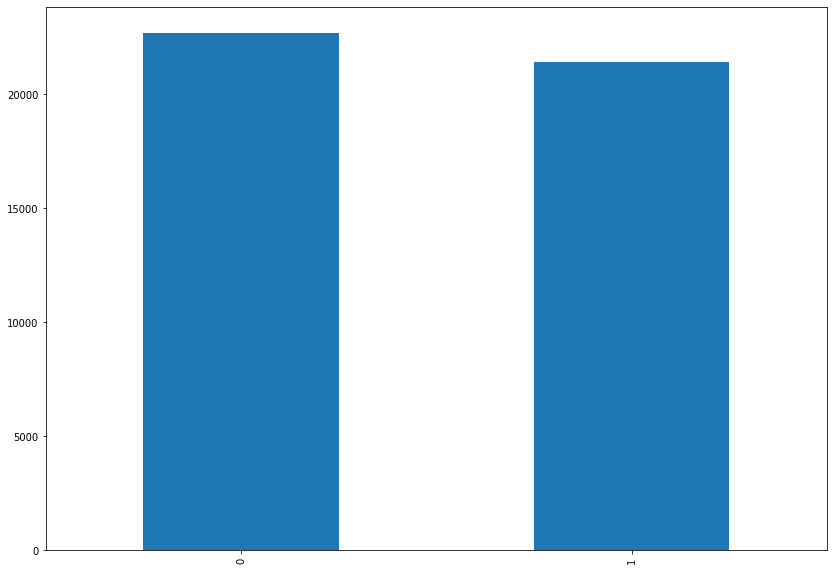

In [ ]:
data_clean['label'].value_counts().plot(kind='bar')

In [ ]:
data_clean.value_counts("label")

label
0    22696
1    21416
dtype: int64

As we can see, our data is indeed balance pretty well - 22696 fake news and 21416 real news

#### Subjects distribution

Our news are categorized to the following subjects:

In [ ]:
data_clean['subject'].unique()

array(['politicsNews', 'worldnews', 'News', 'politics', 'Government News',
       'left-news', 'US_News', 'Middle-east'], dtype=object)

We consider `Government News` and `politicsNews` subjects the same as `politics`, all of them are reviewing the same domain. So let's replace all appearances of `Government News` and `politicsNews` with `politics`

In [ ]:
data_clean['subject'] = data_clean['subject'].str.replace('Government News', 'politics')
data_clean['subject'] = data_clean['subject'].str.replace('politicsNews', 'politics')

In [ ]:
data_clean['subject'].unique()

array(['politics', 'worldnews', 'News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

Now let's see how the data is distributed between the diffetent subjects

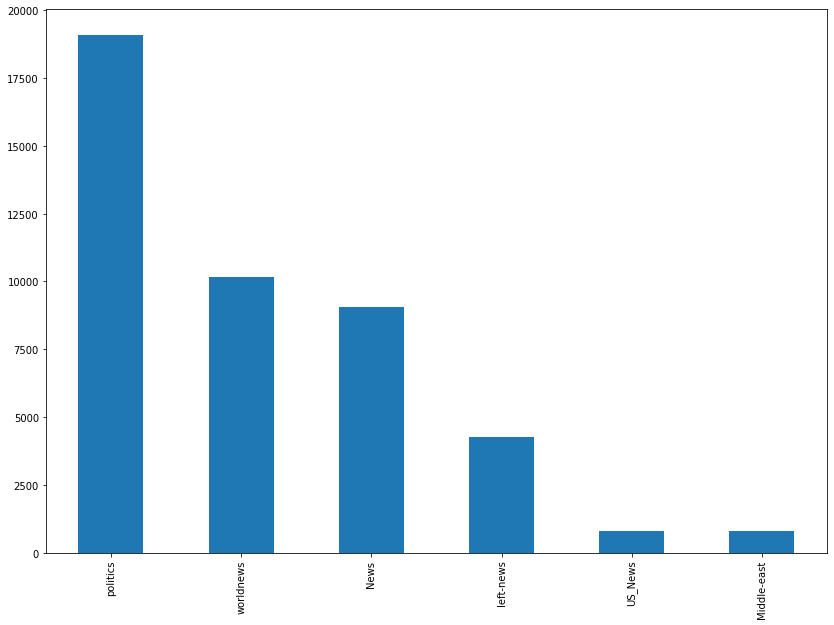

In [ ]:
data_clean['subject'].value_counts().plot(kind='bar')

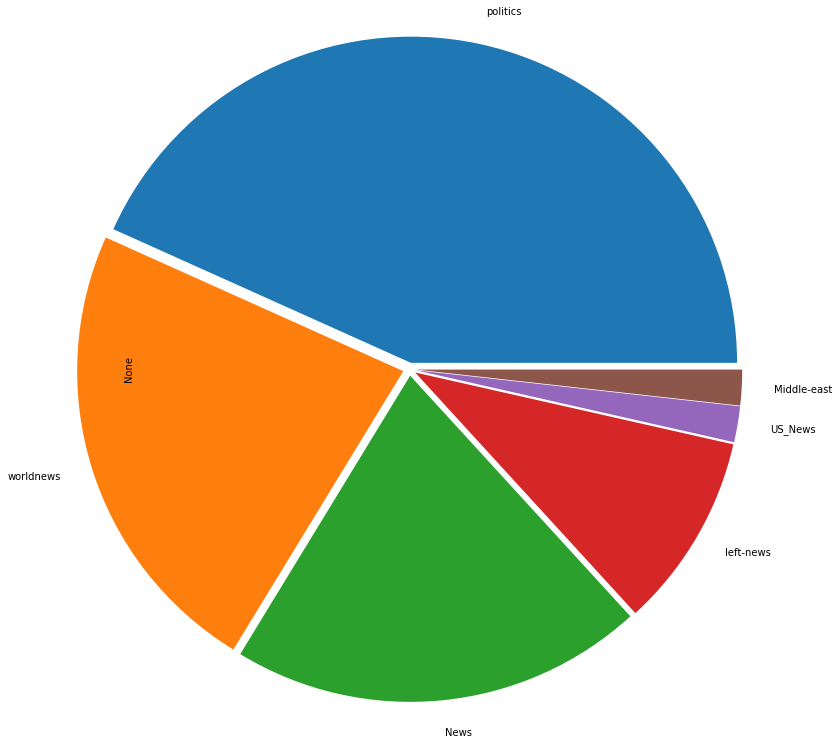

In [ ]:
data_clean.value_counts('subject').plot.pie(radius=1.5, explode=[0.03] * 6)

It's clear what get's our attention the most. Politics news is almost half of the entire news we will process. 

Let's to get some insights from the subject. We'll count the values by subject and label to see if there any relation between those two columns

In [ ]:
data_clean.value_counts(['subject', 'label'])

subject      label
politics     1        11271
worldnews    1        10145
News         0         9050
politics     0         7821
left-news    0         4264
US_News      0          783
Middle-east  0          778
dtype: int64

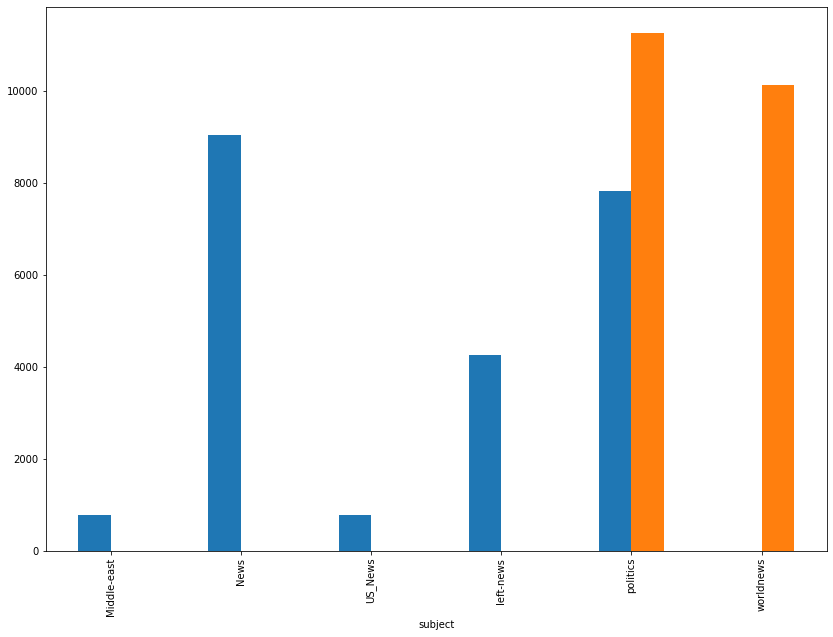

In [ ]:
data_clean[['subject', 'label']].value_counts().to_frame().pivot_table(index='subject', columns='label').plot(kind='bar', legend=False)

Looking at the count and the plot it's very clear that there is no connection at all as except one shared subject ("politics") the subjects discussed in real news are different than those that are discussed in fake news.

Nedless to say, it will be irational to make any decision uppon this insight as we cannot that all news that are disscussing the subject of "middle-east" are fake - it's just not correct.

**The conclusion from this metric is that the subject should not affect any of our models, so we can clean it up...**

In [ ]:
data_clean = data_clean.drop('subject', axis = 1)
data_clean

,title,text,label,date_parsed
0,"as u.s. budget fight looms, republicans flip t...",washington (reuters) - the head of a conservat...,1,2017-12-31
1,u.s. military to accept transgender recruits o...,washington (reuters) - transgender people will...,1,2017-12-29
2,senior u.s. republican senator: 'let mr. muell...,washington (reuters) - the special counsel inv...,1,2017-12-31
3,fbi russia probe helped by australian diplomat...,washington (reuters) - trump campaign adviser ...,1,2017-12-30
4,trump wants postal service to charge 'much mor...,seattle/washington (reuters) - president donal...,1,2017-12-29
...,...,...,...,...
23476,mcpain: john mccain furious that iran treated ...,21st century wire says as 21wire reported earl...,0,2016-01-16
23477,justice? yahoo settles e-mail privacy class-ac...,21st century wire says it s a familiar theme. ...,0,2016-01-16
23478,sunnistan: us and allied ‘safe zone’ plan to t...,patrick henningsen 21st century wireremember ...,0,2016-01-15
23479,how to blow $700 million: al jazeera america f...,21st century wire says al jazeera america will...,0,2016-01-14


#### Dates analysis

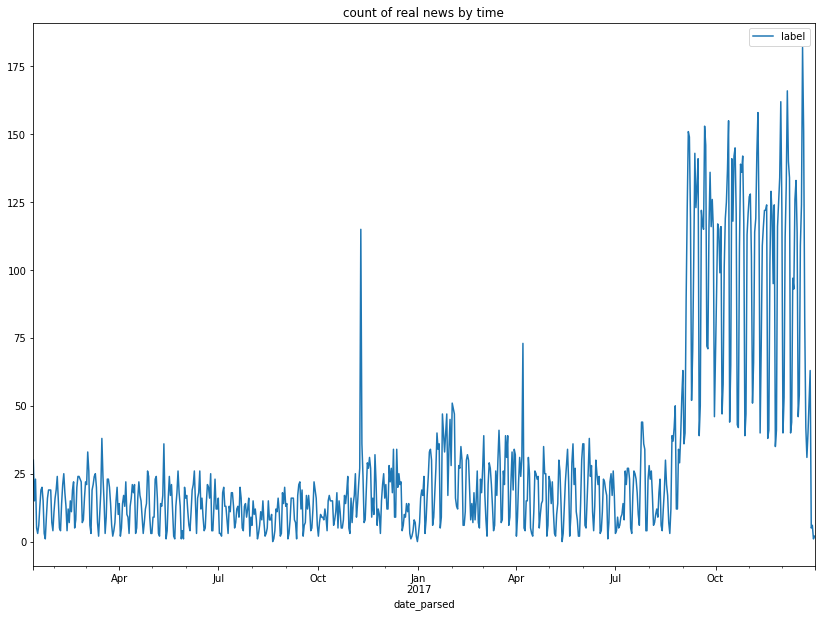

In [ ]:
tmp = data[['date_parsed', 'label']]
tmp[tmp['label']==1].resample('D', on="date_parsed").count()[['label']].plot(title="count of real news by time")

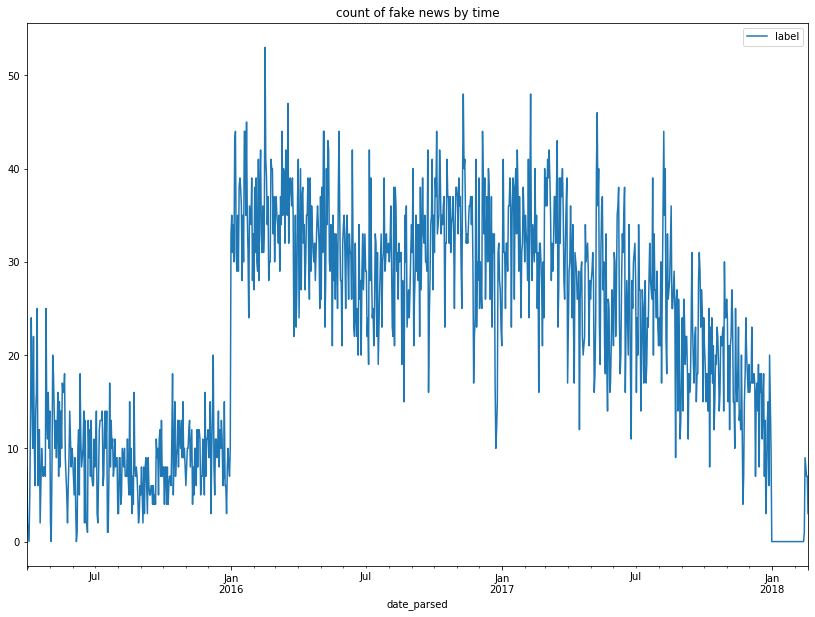

In [ ]:
tmp = data[['date_parsed', 'label']]
tmp[tmp['label']==0].resample('D', on="date_parsed").count()[['label']].plot(title="count of fake news by time")

From the last 2 plots we can learn that there is no strong coloration between the time that the news item publish and it's orientation (fake/real).

The only thing we can learn is that since January 2016, there was a major increase in fake news. Roughtly at this time, the 45th U.S. President Mr. Donald J. Trump started his elections campagin. 

#### Text analysis

##### Words Cloud

We will use nltk module 

In [ ]:
import nltk

nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We will create word cloud to analyse the mosts frequent words for each label

######**Fake news**  Word Cloud 

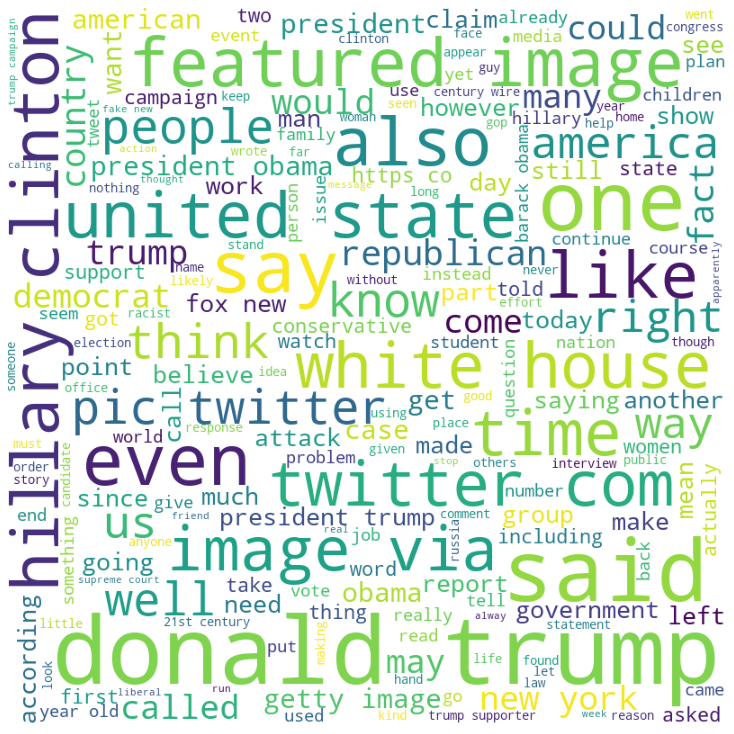

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(data_clean[data_clean['label'] == 0].text)) 
  
# plot the word cloud for fake news data                      
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

###### **Real news**  Word Cloud 

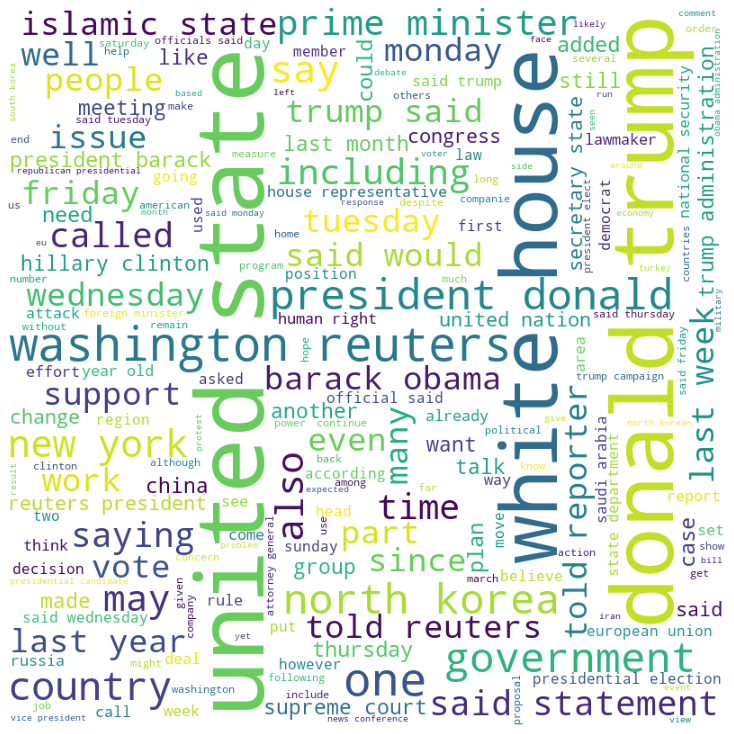

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(data_clean[data_clean['label'] == 1].text)) 
  
# plot the word cloud for fake news data                      
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

We can see repetition of words such as "Donald Trump", "New York", "White House", and more..

##### Frequency Distrabution

World Cloud is a nice way to see way to visualize what words are sagnificant in out text, however it's not the only way to do it.

Let's try to get more information by analyzing the frequency of the most frequent terms in our text.

First, we'll start with some imports and preperations.

In [ ]:
# load stop words list
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.probability import FreqDist
from nltk import word_tokenize

nltk.download('punkt')
s = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


We will build a funciton that gets series and returns frequency distrabution without stop words and punctuation.

In [ ]:
import re
def get_freq_dist(arr):
  output_dist = dict()
  all_words = word_tokenize(" ".join(arr))
  word_freq = FreqDist(all_words)
  for (key, value) in word_freq.items():
    if bool(re.match("\w+", key)) and (key not in s):
      output_dist[key] = value
  return FreqDist(output_dist)

Now let's use it to plot the *Frequency Distrabution* graph, we'll do it both for real news and fake news

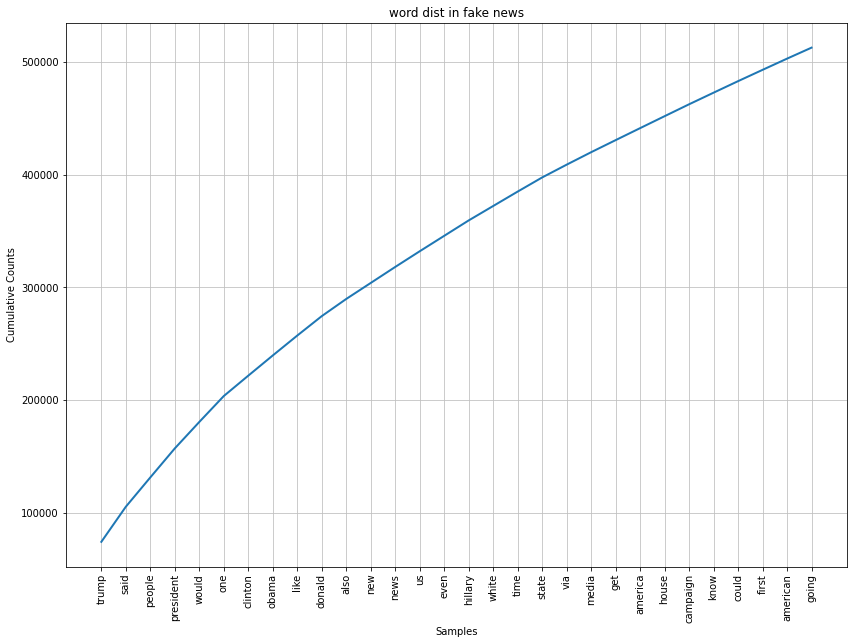

In [ ]:
get_freq_dist(data_clean[data_clean['label']==0]['text']).plot(30, cumulative=True, title="word dist in fake news")

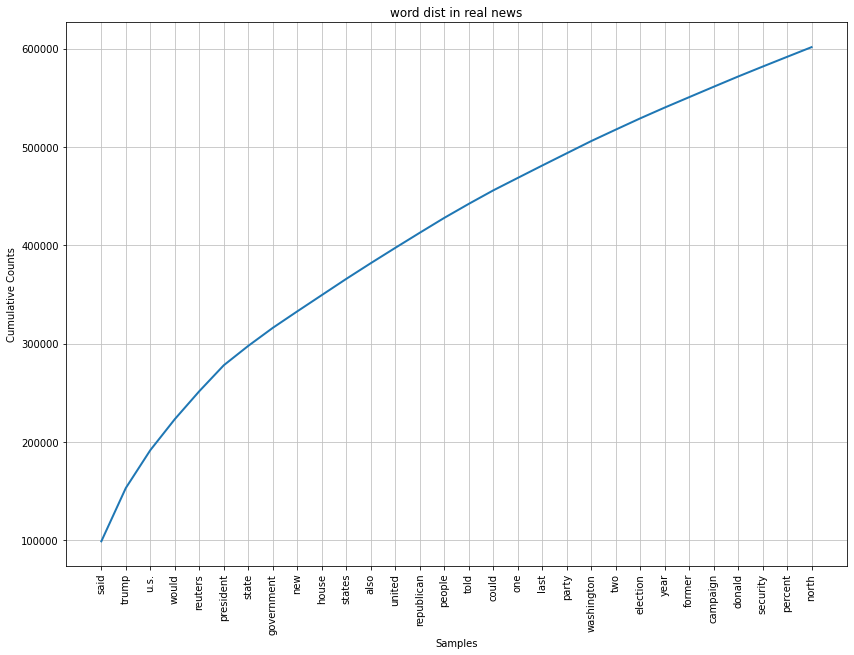

In [ ]:
get_freq_dist(data_clean[data_clean['label']==1]['text']).plot(30, cumulative=True, title="word dist in real news")

The most interest thing we can pull out from those 2 plots is the differnce between them. There is a slight and weak connection between those two. The reason this fact is interesting is that we can learn from that the ferquency of specific words in a news item might affect it's classification.

With that being said, we should take into consideration that words like "also", "told", "last" for example, are very common words in the English language and it definitely can't solely determine the classification of text.

To create better bond between term frequency and the classification we'll need to analyze the frequency of more than 1 word.

We'll have the similer analsys for 2 and 3 words terms, we'll use N-grams in order to do so.

###### **2 Words Diagram (2-gram)**

In [ ]:
from nltk import ngrams

In [ ]:
def get_ngram_dist(arr, n):
  output_dist = dict()
  all_words = word_tokenize(" ".join(arr))
  
  word_freq = FreqDist(ngrams(all_words, n))
  for (key, value) in word_freq.items():
    if all(map(lambda x: bool(re.match("\w+", x)) and (x not in s), key)):
      output_dist[key]=value
  return FreqDist(output_dist)

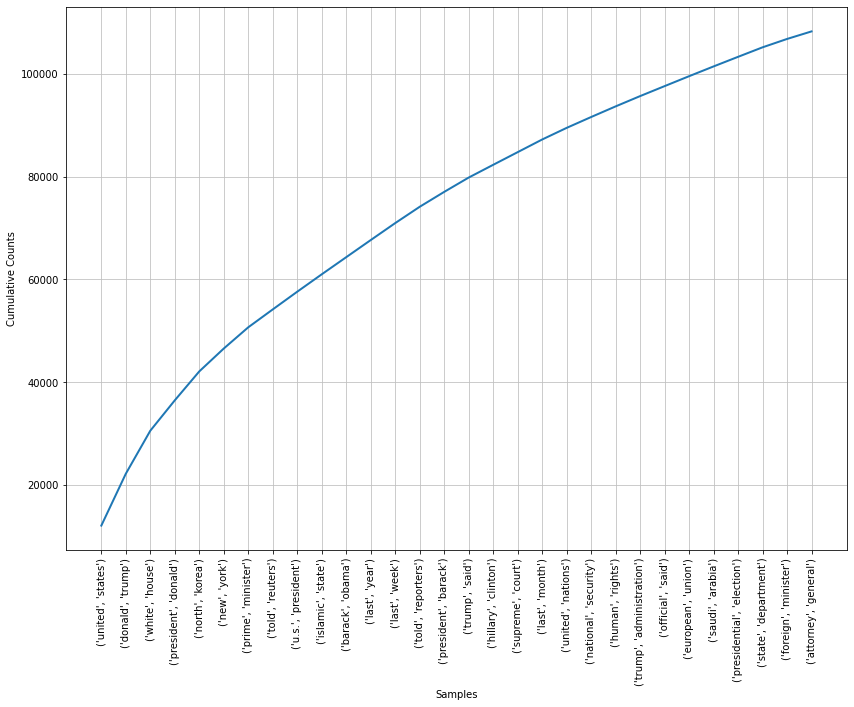

In [ ]:
get_ngram_dist(data_clean[data_clean['label']==1]['text'], 2).plot(30, cumulative=True)

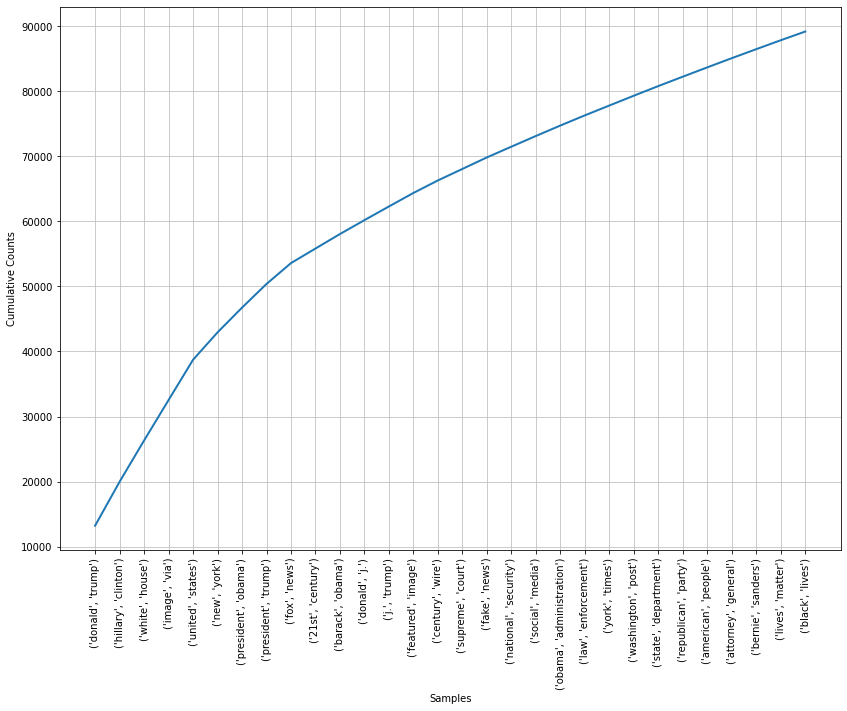

In [ ]:
get_ngram_dist(data_clean[data_clean['label']==0]['text'], 2).plot(30, cumulative=True)

It's pretty clear that this graph is more helpful. We still can't extract any "thumb rules" out of it but we can see for example that there were a lot of fake news about the Black Lives Metter Foundation.

###### **3 Words Diagram (3-gram)**

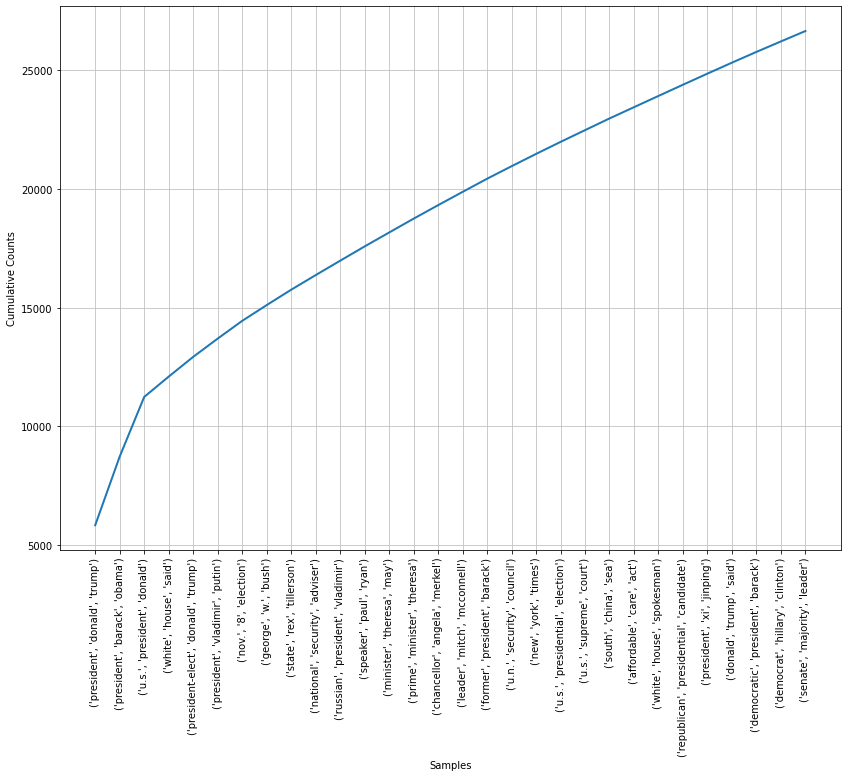

In [ ]:
get_ngram_dist(data_clean[data_clean['label']==1]['text'], 3).plot(30, cumulative=True)

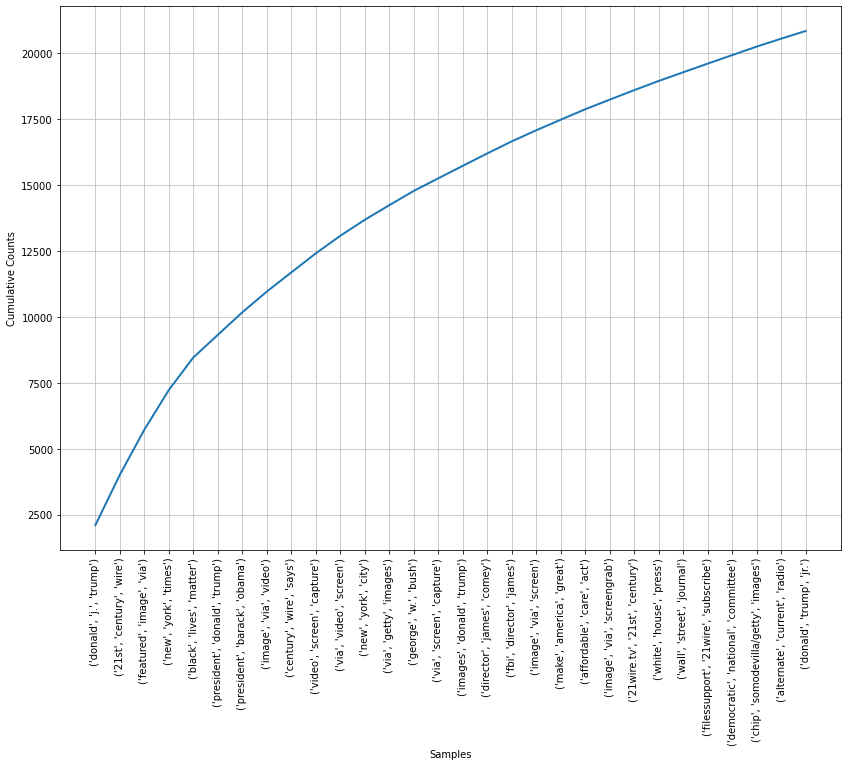

In [ ]:
get_ngram_dist(data_clean[data_clean['label']==0]['text'], 3).plot(30, cumulative=True)

##### Text length analsys

###### ***Words count***

Let's look on number of words and try to figure out if there is any connection between the count of the words in the text to it's classification.

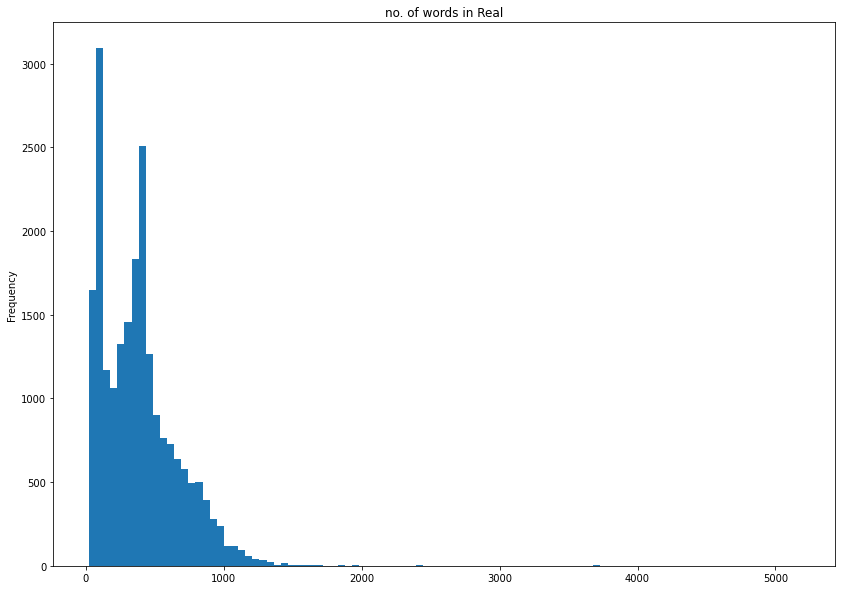

In [ ]:
_=data_clean[data_clean['label']==1].text.str.split().str.len()
_.plot(kind='hist', title='no. of words in Real', bins=100)

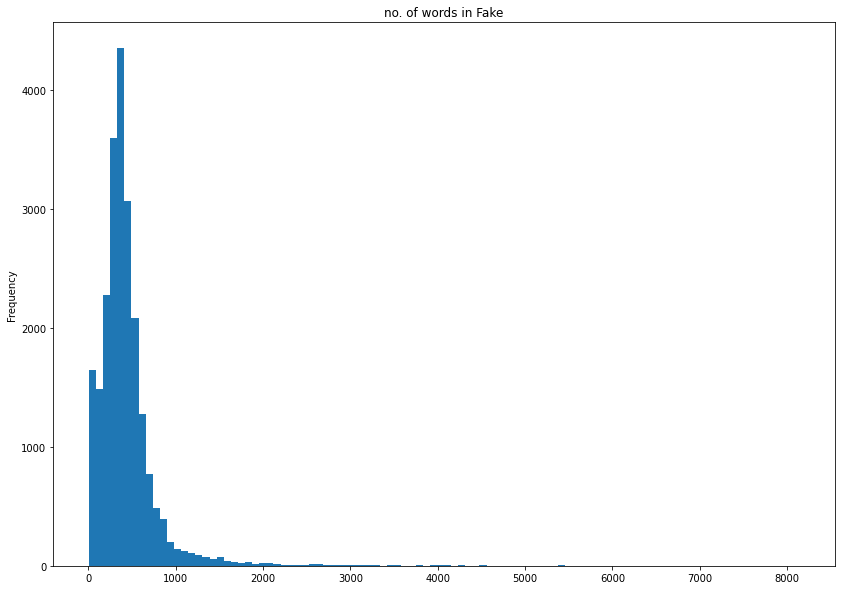

In [ ]:
_=data_clean[data_clean['label']==0].text.str.split().str.len()
_.plot(kind='hist', title='no. of words in Fake', bins=100)

We can see that in general number of words in fake news is lower than number of words in real news, it might be a good information for our models to relay on in the future 

###### ***Average words lenght***
In similar way, let's exmine the avarge length of words in out text

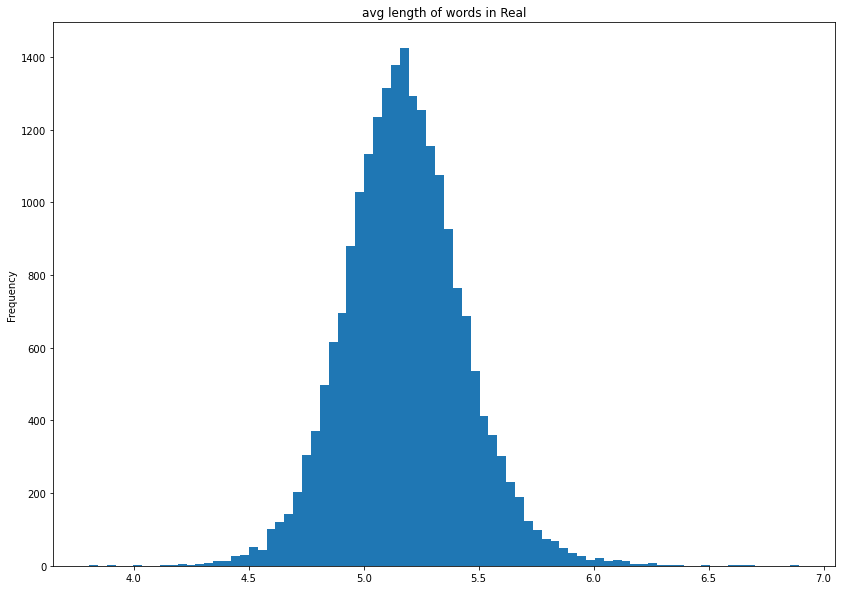

In [ ]:
_ = data_clean[data_clean['label']==1].text.str.split().map(lambda x:np.mean([len(word) for word in x]))
_.plot(kind='hist', title='avg length of words in Real', bins=80)

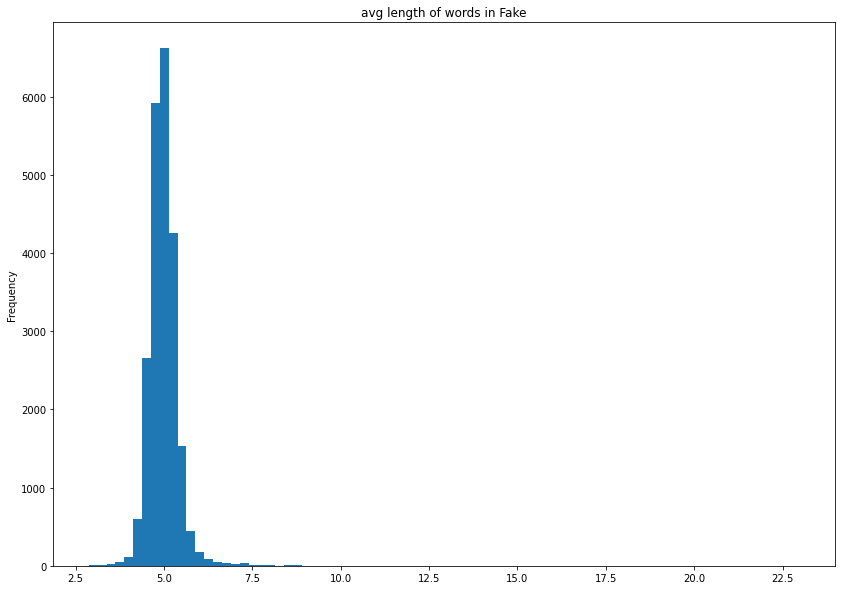

In [ ]:
_ = data_clean[data_clean['label']==0].text.str.split().map(lambda x:np.mean([len(word) for word in x]))
_.plot(kind='hist', title='avg length of words in Fake', bins=80)

We can see clearly that the average words length in real news is well distrabuted.

###### ***Character words lenght***

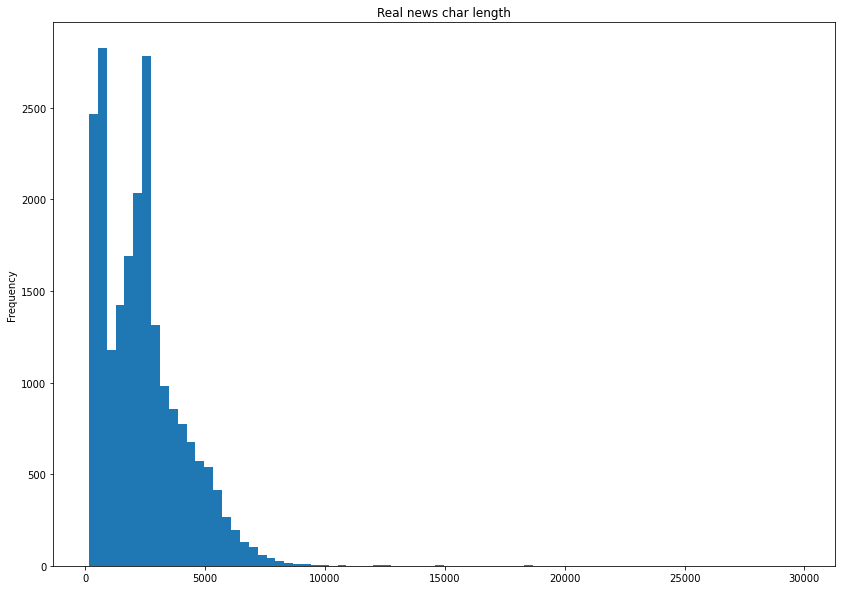

In [ ]:
_ = data_clean[data_clean['label']==1].text.str.len()
_.plot(kind='hist', title='Real news char length', bins=80)

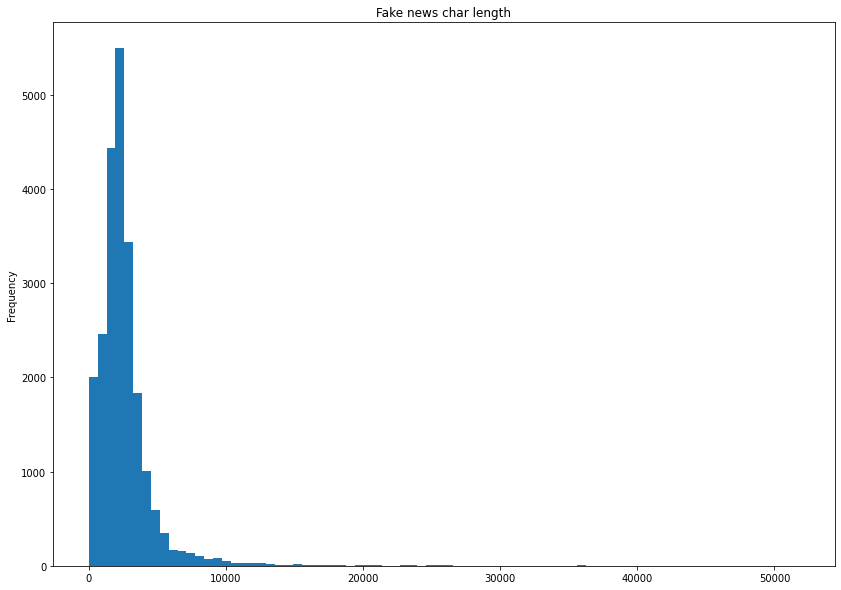

In [ ]:
_ = data_clean[data_clean['label']==0].text.str.len()
_.plot(kind='hist', title='Fake news char length', bins=80)

This metric turns to be not very useful.

##### Sentiments analsys

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


First of all, let's assess what this tool can be used for.
To do so, we'll feed the `polarity_score` function with a random sentence and we'll see what it returns.

In [ ]:
sia.polarity_scores("Wow, NLTK is really powerful!")

{'compound': 0.8012, 'neg': 0.0, 'neu': 0.295, 'pos': 0.705}

No let's compare our Negativity, Posativity, and Neutrality rates in our text to find out if can help us to classify the text.

Le's start with some preperation steps...

In [ ]:
from tqdm import tqdm
tqdm.pandas()

def add_sent(row):
  return sia.polarity_scores(row['text'])

The following extraction will take a while as it's very hard analsys to preform.

In [ ]:
data_clean['sentiments'] = data_clean.progress_apply(add_sent, axis=1)

100%|██████████| 44112/44112 [04:33<00:00, 161.41it/s]


In [ ]:
from pandas.io.json import json_normalize

In [ ]:
data_clean['sentiments_compound'] = data_clean['sentiments'].apply(lambda r: r['compound'])
data_clean['sentiments_neg'] = data_clean['sentiments'].apply(lambda r: r['neg'])
data_clean['sentiments_neu'] = data_clean['sentiments'].apply(lambda r: r['neu'])
data_clean['sentiments_pos'] = data_clean['sentiments'].apply(lambda r: r['pos'])

###### Negative sentiments

Let's compare the negative sentiments

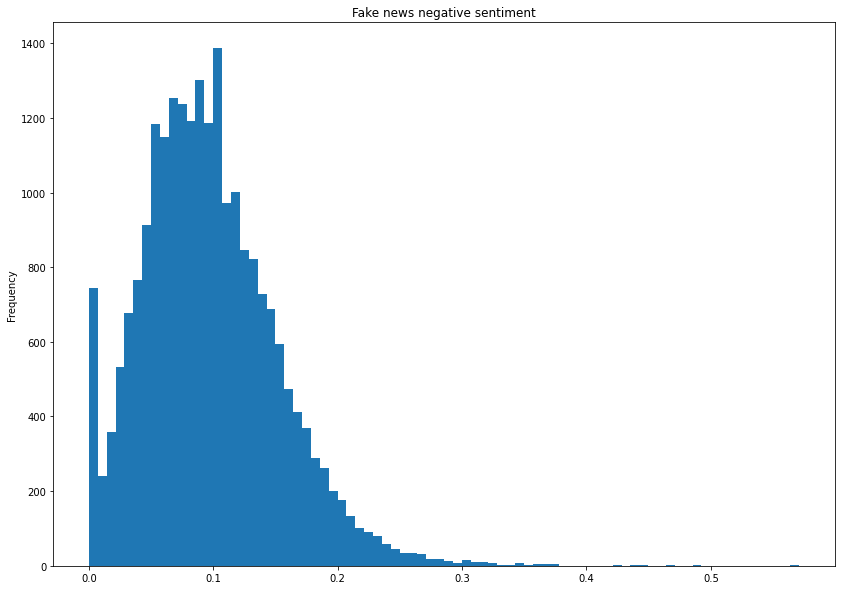

In [ ]:
data_clean[data_clean['label']==0]['sentiments_neg'].plot(kind='hist', title='Fake news negative sentiment', bins=80)

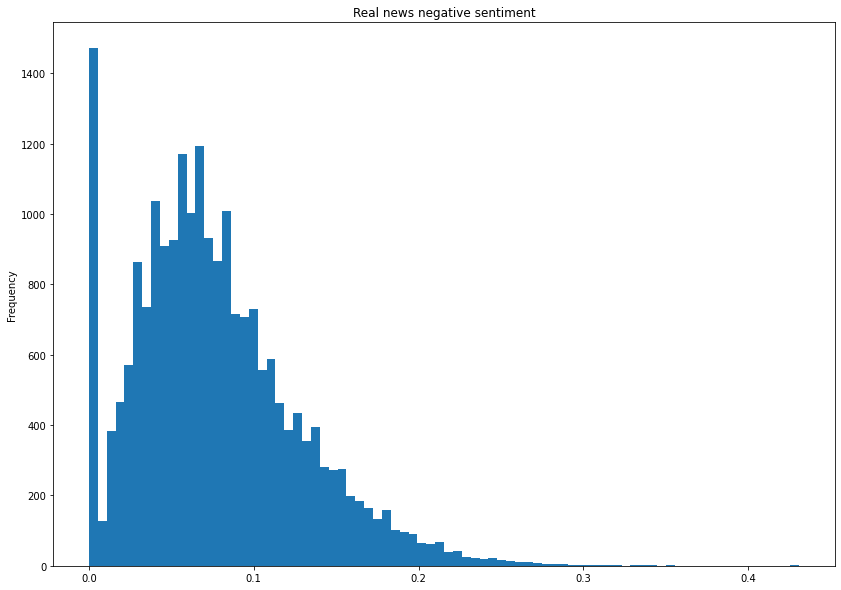

In [ ]:
data_clean[data_clean['label']==1]['sentiments_neg'].plot(kind='hist', title='Real news negative sentiment', bins=80)

The plots looks pretty much the same, **negeative sentiment won't help us to classify the text.**

###### Positive sentiments

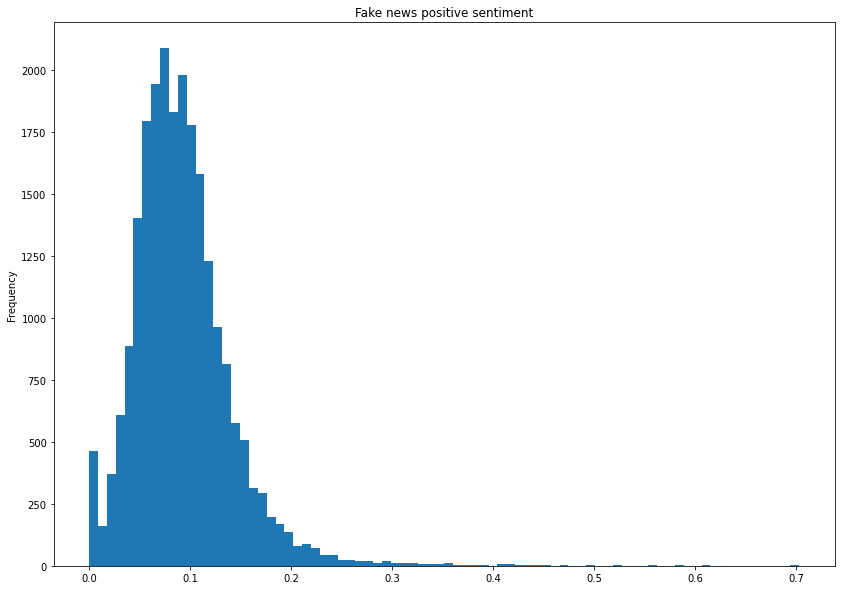

In [ ]:
data_clean[data_clean['label']==0]['sentiments_pos'].plot(kind='hist', title='Fake news positive sentiment', bins=80)

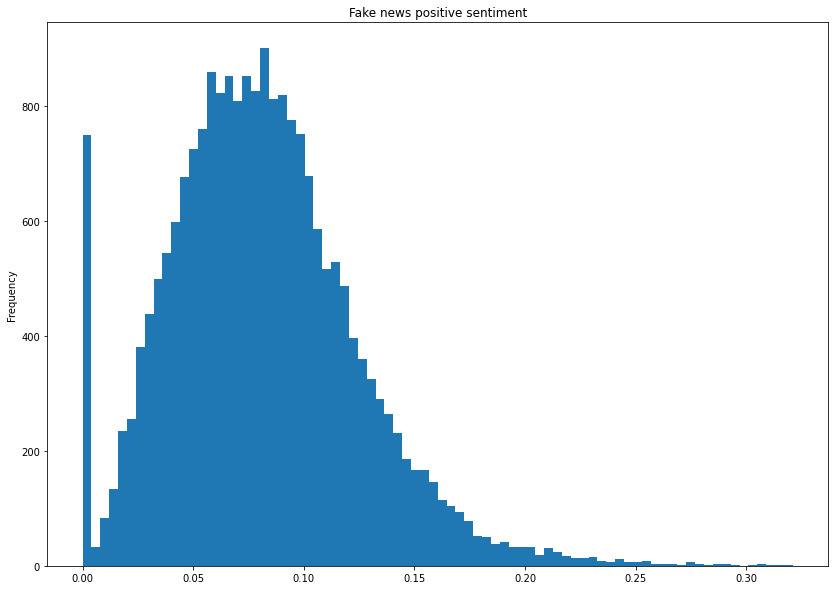

In [ ]:
data_clean[data_clean['label']==1]['sentiments_pos'].plot(kind='hist', title='Fake news positive sentiment', bins=80)

Positivity is also pretty much the same between real and fake news.

Let's compare the neutral sentiments

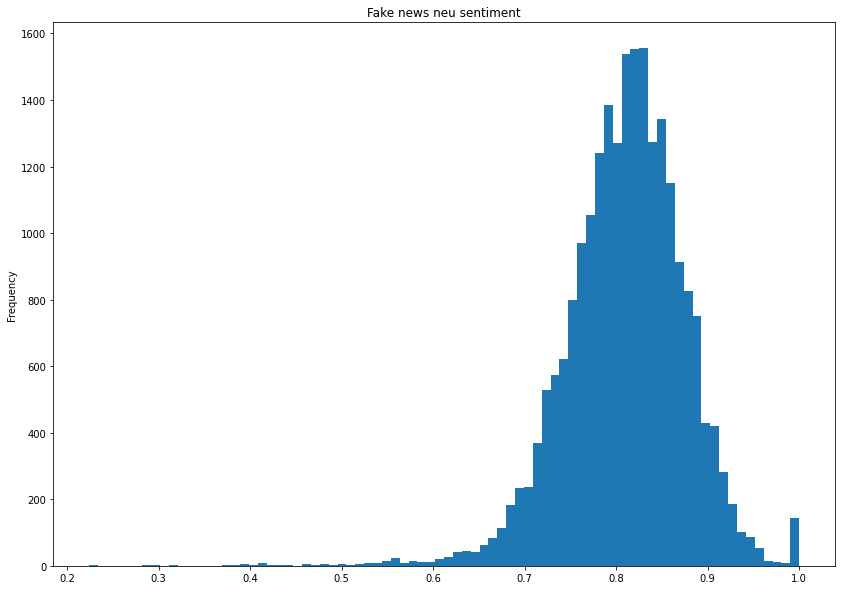

In [ ]:
data_clean[data_clean['label']==0]['sentiments_neu'].plot(kind='hist', title='Fake news neu sentiment', bins=80)

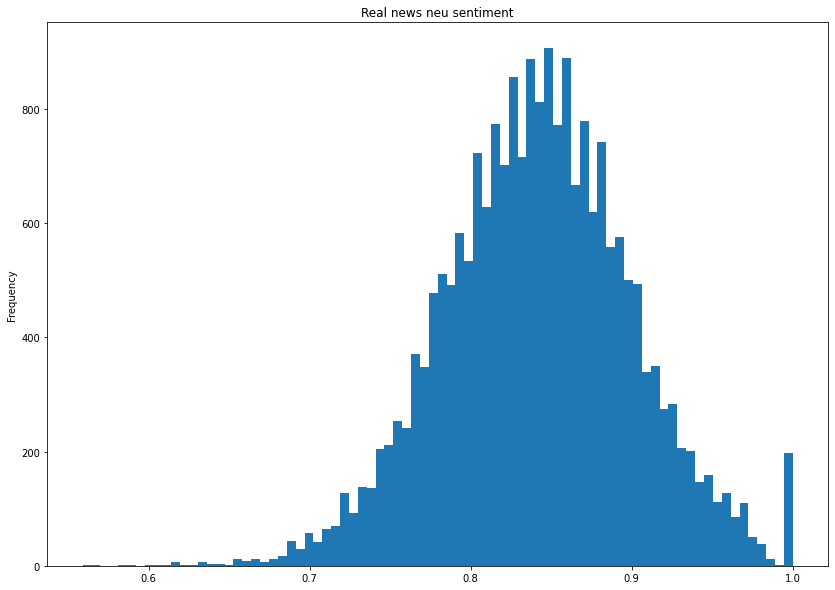

In [ ]:
data_clean[data_clean['label']==1]['sentiments_neu'].plot(kind='hist', title='Real news neu sentiment', bins=80)

Real news might be more neutral than fake news and to be honest it's not surprising. If you'll think about it, real news are fact, so they must be neutral, on the other end, fake news are always baised.

### Wrapping up EDA stage


We are done with the EDA stage.

Altghoth this stage couln't "win by itself" and couldn't reveal a set of rules to confidantly classify the data, it was indeed an educational and important stage.

Let's have a look on what we've achieved durring our EDA:


1.   *Our data is clean* - by the time we started we had a lot of data that could make it harder for any model we'll choose to handle the task - we dropped or fixed those rows.
2.   *We understand our data* - The plots and the small dataframes we presented along the way helped us to understand how our data is stractured.
3.   *We found that our dataset is coherent* - It's clear now that our dataset is not just `110MB` of random text, but it's a dataset with proper relations that we can harness to our need.





---
## Using smart algorithms to fight Fake News


### NLP Algorithm

We'll use NLP tools that were design exactly to this purpose of text classification. Those tools are not only very easy to use, but also should restult good classification scores, so let's try them out.

First of all we'll split the data to 4 goups. 

***`train`***-  80% will be used for training our models, this group will be devided to 2 - `x_train` is the text (the actual news item) `y_train` is the label, a.k.a the boolean indicator if the news item is fake (0) or true (1)

***`test`***-  20% will be used to assess the accuracy of our models, this group will also be devided to 2 groups - `x_test` and `y_test`.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data['text'],data['label'],test_size=0.2, random_state = 1)
datasets = x_train, y_train, x_test, y_test

Now we have the splitted data.
Let's verify that it's distrabuted properly and see how many truth and fake values we have in each one of `test` and `train`


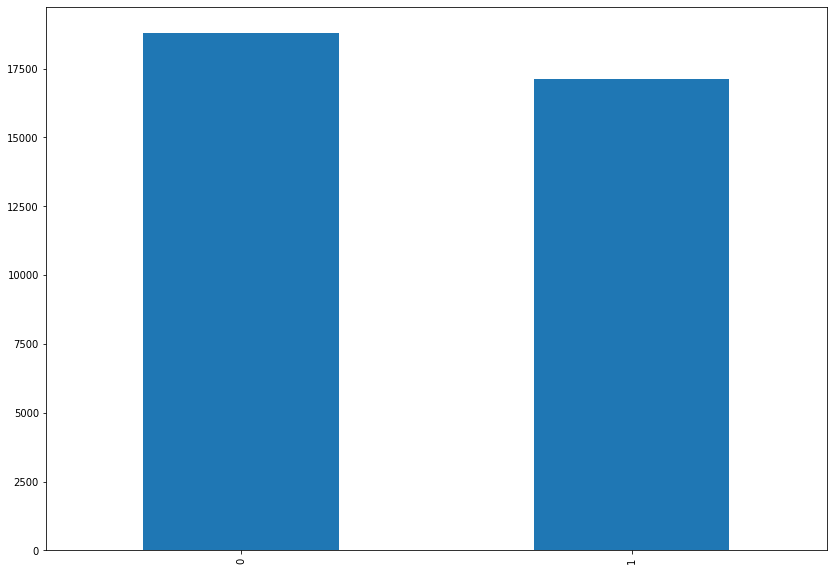

In [ ]:
y_train.value_counts().plot(kind="bar")

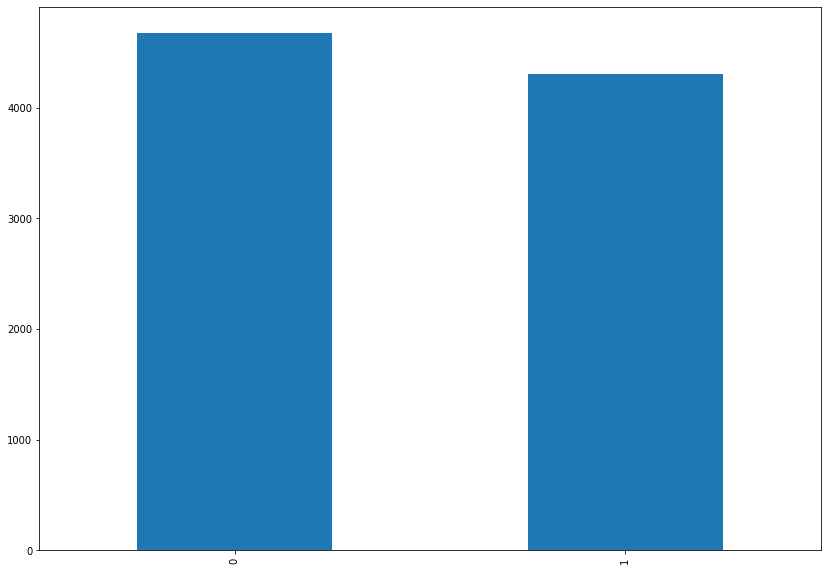

In [ ]:
y_test.value_counts().plot(kind="bar")

Now let's use NLP algorithems from `sklearn` to tuckle this problem.
We'll use 2 of them:


1.   Multinomial Naive Bayes
2.   Linear SVC (Support Vector Classifier)

Those 2 are numeric algoritam that will help us to classify the text - we'll elaborate a bit about both of them later.

Using those models we hope to be able to predict if the text is real or fake.

#### Creating an infrastracture

As first step, let's create an infrastacture that will help use to create those models easily nd indipandently of the type of the model.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score                                              
from mlxtend.plotting import plot_confusion_matrix
import sklearn.metrics as metrics

def create_a_model(pipline_arguments, x_train, y_train, x_test, y_test):
  pipe = Pipeline(pipline_arguments)

  model = pipe.fit(x_train, y_train)
  prediction = model.predict(x_test)
  score = metrics.accuracy_score(y_test, prediction)

  return (model, prediction, score)

def create_and_plot_confusion_metric(prediction, score, y_test):
  score_precent = 100 * score
  print(f"Accuracy:   {score_precent:.4f}")
  cm = metrics.confusion_matrix(y_test, prediction, labels=[0, 1])
  fig, ax = plot_confusion_matrix(conf_mat=cm,
                                  show_absolute=True,
                                  show_normed=True,
                                  colorbar=True)
  plt.show()

def create_classification_report(y_test, prediction):
    report = metrics.classification_report(y_test, prediction)
    report = [x.split(' ') for x in report.split('\n')]
    header = ['Class Name']+[x for x in report[0] if x!='']
    values = []
    for row in report[1:-5]:
        row = [value for value in row if value!='']
        if row!=[]:
            values.append(row)
    df = pd.DataFrame(data = values, columns = header)
    return df

Now when have the infrastructre set-up, we are ready to use our algorithems!

**Let's get the party started :)**

As we want to be able to keep compare between the results of each algorithm, we'll create an empt DF that we'll fill with the classification score of each algorithm - we'll call it `results`

In [ ]:
results = pd.DataFrame()

#### Multinomial Naive Bayes


**Multinomial Naive Bayes** (a.k.a **MultinomialNB**) algorithm is a probabilistic learning method. The algorithm is based on the [Bayes theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem). It calculates the probability of each term for a given sample and then gives the term with the highest probability as output.

**MultinomialNB** algorithm is easy to implement as you only have to calculate probability and it can be used on both continuous and discrete data.
Although the prediction accuracy of this algorithm is lower than the other probability algorithms, it is highly scalable and can easily handle large datasets like the one we have (and even grater).

So first of all, let's import the *MultinomialNB* classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

##### BoW (Bag of Words) vectorizer

We are vectorizing our data using `CountVectorizer` which is the basic [BoW (Bag of Words)](https://en.wikipedia.org/wiki/Bag-of-words_model). What bag of words does is basicly to count the number of apperances of each word in our texts. In this way we are vectorizing words to a numeric value that the model "knows how to handle".

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
count_vectorizer.fit(x_train)
bag_of_words = pd.Series(count_vectorizer.vocabulary_).to_frame('count')
bag_of_words

,count
united,103899
nations,69137
reuters,84872
the,98958
iran,51996
...,...
kinks,56503
reagancare,82504
biter,16656
3327,4711


Let's create and train the model.


In [ ]:
pipline_arguments = [
    ('vectorizer', count_vectorizer),
    ('classifier', MultinomialNB())
]

model, prediction, score = create_a_model(pipline_arguments, *datasets)

Now, to assess the accuracy of our model, we'll plot the text into confusion metric.
Accuracy considered to be the ratio between the number of correct predictions from the total number of predictions - $\frac{CorrectPredictions}{Total Number Of Predictions}$

Confusion matrix is a matrix which can give us a great overview about the results of our model. 
The idea behind it is that it compares predicted values and the actual values, and it's using 4 measurements to evaluate the performance:

*   **Correct predictions:**
  *   True positive: *the prediction was `True` and the actual label is `True` too.*
  *   True Negative: *the prediction was `Fake` and the actual label is `Fake` too.* 
*   **Incorrect predictions:**
  *   False Positive: *the prediction was `True` but the actual label is `Fake` too.*
  *   False Negative: *the prediction was `Fake` but the actual label is `True` too.*

***We'll use this type of metric in most of our models...***

Accuracy:   95.2673


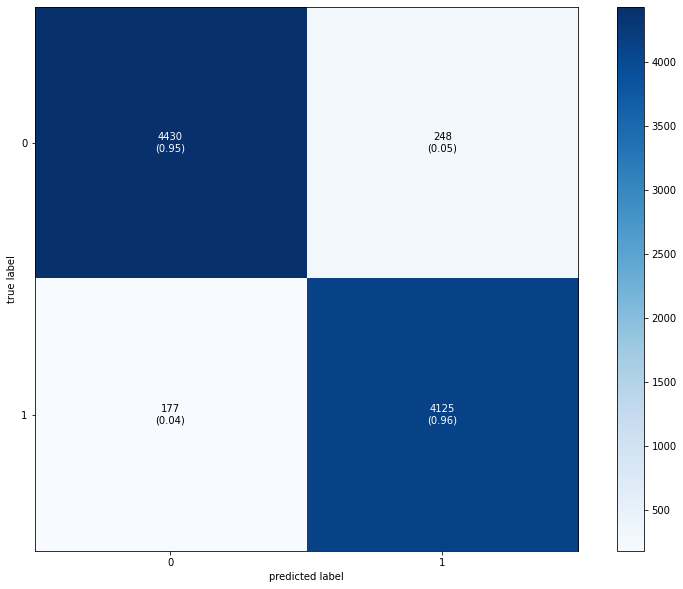

In [ ]:
create_and_plot_confusion_metric(prediction, score, y_test)

In [ ]:
report = create_classification_report(y_test, prediction)
report["Algorithm"] = "MultinuminalNB"
report["Vectorizer"] = "BoW"
results = pd.concat([results, report], ignore_index = True)
results

,Class Name,precision,recall,f1-score,support,Algorithm,Vectorizer
0,0,0.96,0.95,0.95,4678,MultinuminalNB,BoW
1,1,0.94,0.96,0.95,4302,MultinuminalNB,BoW


##### TF-IDF vectorizer


[TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) is often refered as "smarter bag-of-words" and normaly it's the number one choice while willing to vectorize textual data.

It's similer to BoW in the porpuse but has different specifics.
Before we elaborate, let's flash-forward to the result...

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(x_train)
tfidf = pd.Series(tfidf_vectorizer.idf_).to_frame('score')
tfidf

,score
0,5.826061
1,2.949871
2,8.849964
3,10.390409
4,10.795875
...,...
111863,10.795875
111864,10.390409
111865,10.102727
111866,10.795875


As you can see, instead of count, each word get's a some kind of score.

TF-IDF is a statistical measure that evaluates how relevant a word is to a document (or in all the texts combiened in our case). 
This is done by multiplying two metrics: 
 

1.   *The term frequency of a word in a document* - as simple as it sounds, the number of times the term `t` appears in documnet `d`
2.   *The inverse document frequency* - calculated in the following way - $idf_t = \log{\frac{N}{df_t}}$ while $N$ is the total count of documents and $df_t$ is the count of documents that the term `t` appears on
>In our discussion each line considered to be a *document* and each word in the line (or more accuratly everythings between 2 spaces) considered to be a *term*

Let's create and train the model.


In [ ]:
pipline_arguments = [
    ('vectorizer', tfidf_vectorizer),
    ('classifier', MultinomialNB())
]

model, prediction, score = create_a_model(pipline_arguments, *datasets)

Now let's see how this configuration is doing.

Accuracy:   93.8419


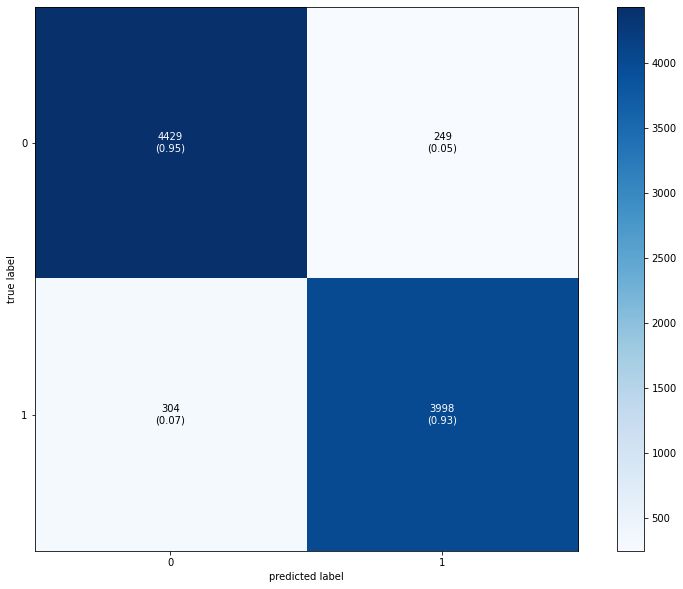

In [ ]:
create_and_plot_confusion_metric(prediction, score, y_test)

In [ ]:
report = create_classification_report(y_test, prediction)
report["Algorithm"] = "MultinuminalNB"
report["Vectorizer"] = "TF-IDF"
results = pd.concat([results, report], ignore_index = True)
results

,Class Name,precision,recall,f1-score,support,Algorithm,Vectorizer
0,0,0.96,0.95,0.95,4678,MultinuminalNB,BoW
1,1,0.94,0.96,0.95,4302,MultinuminalNB,BoW
2,0,0.94,0.95,0.94,4678,MultinuminalNB,TF-IDF
3,1,0.94,0.93,0.94,4302,MultinuminalNB,TF-IDF


Surprizingly it got worse score.
As TF-IDF setting a score and not raw count of words, we would expect to get better results by using it.

On explaination is that repetetive words is the same line are classified correctly as fake and that's exactly what TD-IDF is ignoring from.

#### LinearSVC

SVM or [Support Vector Machine](https://en.wikipedia.org/wiki/Support-vector_machine) is a linear model for classification and regression problems. 
The idea of SVM is simple: *The algorithm creates a line or a hyperplane which separates the data into classes.*
In our case, we have only 2 classes - Real news and Fake news.

There are many types of SVM algorithms. In our case we'll use Linear SVM.

It's much easier to understand what the algorithm does bt looking at the following plot:
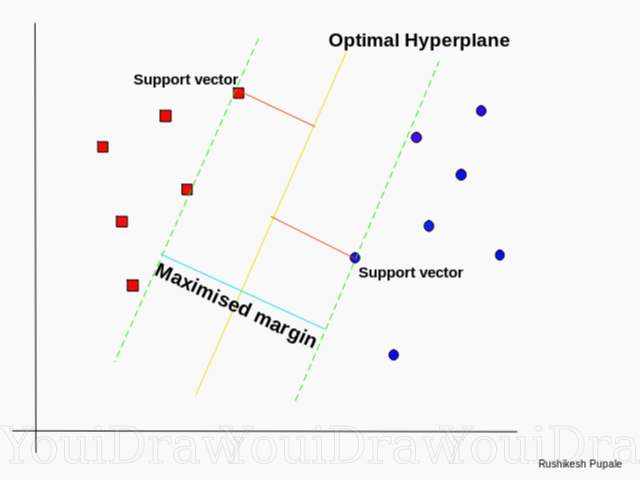

As we did before, let's train our model with BoW vectoriztion first

In [ ]:
from sklearn.svm import LinearSVC
pipline_arguments = [
    ('vectorizer', CountVectorizer()),
    ('classifier', LinearSVC())
]
model, prediction, score = create_a_model(pipline_arguments, *datasets)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy:   99.6325


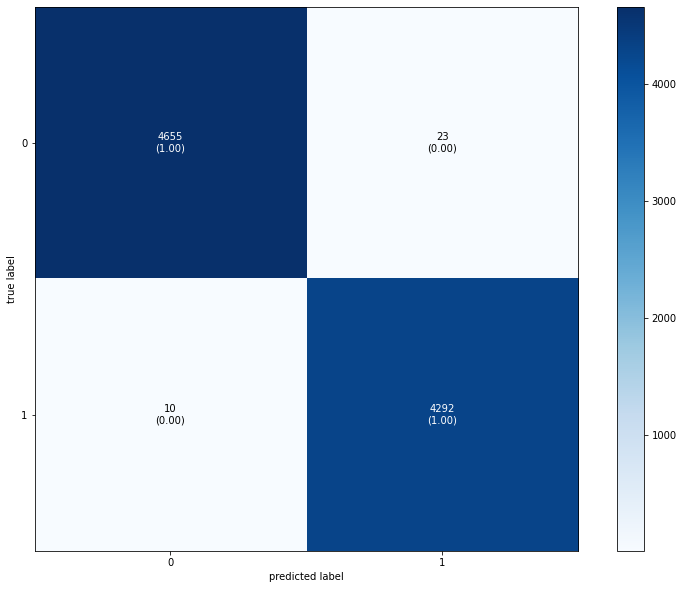

In [ ]:
create_and_plot_confusion_metric(prediction, score, y_test)

In [ ]:
report = create_classification_report(y_test, prediction)
report["Algorithm"] = "LinearSVC"
report["Vectorizer"] = "BoW"
results = pd.concat([results, report], ignore_index = True)
results

,Class Name,precision,recall,f1-score,support,Algorithm,Vectorizer
0,0,0.96,0.95,0.95,4678,MultinuminalNB,BoW
1,1,0.94,0.96,0.95,4302,MultinuminalNB,BoW
2,0,0.94,0.95,0.94,4678,MultinuminalNB,TF-IDF
3,1,0.94,0.93,0.94,4302,MultinuminalNB,TF-IDF
4,0,1.00,1.00,1.00,4678,LinearSVC,BoW
5,1,0.99,1.00,1.00,4302,LinearSVC,BoW


Now let's do the same using TF-IDF



In [ ]:
pipline_arguments = [
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LinearSVC())
]
model, prediction, score = create_a_model(pipline_arguments, *datasets)

Accuracy:   99.5212


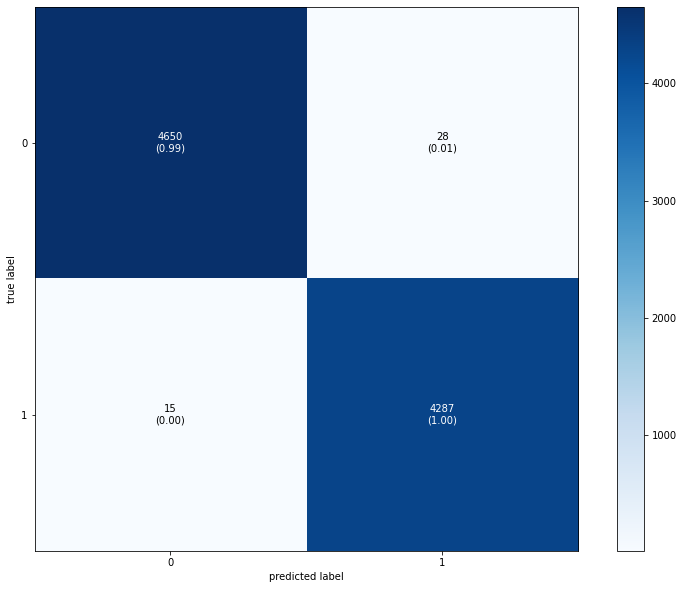

In [ ]:
create_and_plot_confusion_metric(prediction, score, y_test)

In [ ]:
report = create_classification_report(y_test, prediction)
report["Algorithm"] = "LinearSVC"
report["Vectorizer"] = "TF-IDF"
results = pd.concat([results, report], ignore_index = True)

Again, we can see that we have a slight advantage to the naive Bag-of-Words.

---
## Results and conclusions 

### Algorithams results

We made some progress till now and we got various results, let's compare our results.

We've set erliear a dataframe named `results` which contains all the results we had from our algorithams. Currently it looks like the following:

In [ ]:
results

,Class Name,precision,recall,f1-score,support,Algorithm,Vectorizer
0,0,0.96,0.95,0.95,4678,MultinuminalNB,BoW
1,1,0.94,0.96,0.95,4302,MultinuminalNB,BoW
2,0,0.94,0.95,0.94,4678,MultinuminalNB,TF-IDF
3,1,0.94,0.93,0.94,4302,MultinuminalNB,TF-IDF
4,0,1.00,1.00,1.00,4678,LinearSVC,BoW
5,1,0.99,1.00,1.00,4302,LinearSVC,BoW
6,0,1.00,0.99,1.00,4678,LinearSVC,TF-IDF
7,1,0.99,1.00,1.00,4302,LinearSVC,TF-IDF


Let's adjust the indexing, fill human-readable values and show it again...

In [ ]:
results["Class Name"] = results["Class Name"].replace([0,1],["Fake", "Real"])
results = results.set_index(["Algorithm", "Vectorizer", "Class Name"])
results

precision recall f1-score support
Algorithm      Vectorizer Class Name                                  
MultinuminalNB BoW        0               0.96   0.95     0.95    4678
                          1               0.94   0.96     0.95    4302
               TF-IDF     0               0.94   0.95     0.94    4678
                          1               0.94   0.93     0.94    4302
LinearSVC      BoW        0               1.00   1.00     1.00    4678
                          1               0.99   1.00     1.00    4302
               TF-IDF     0               1.00   0.99     1.00    4678
                          1               0.99   1.00     1.00    4302

Much better, doesn't it ?

Now let's explain a bit what we see here. 

For each algoritham we hold 2 rows, one for each classification class (a.k.a the classes we want to classify our data to) - `0: Fake news` and `1: Real news`.

**For each of those rows we present the following details:**


1.   *Algorithm* - Which algoritham we were using to get this result (SVM, MultinuminalNB, etc...)
2.   *Vectorizer* - Which vectorization method we were using to get this result (TF-IDF, Bag-of-Words, etc...)
3.   *Support* - how many sample were tested to support the result
4.   *Precision* - $\frac{True Positive}{TruePositive + FalsePositive}$
5.   *Recall* - $\frac{True Positive}{TruePositive + FalseNegative}$
6.   *F1-score* - $\frac{2(Precision*Recall)}{Precision+Recall}$

>*The following [articale](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9) elaborates on each one of those scores*



### General conclusions and summery

First of all, let's answer the question that kick-started this project 

>*Can we detect fake news online?*

Well, we've proved that the answer is **YES!!!** It's very clear that we managed to get pretty good results "right out of the box". We also managed to improve those initial good results with some simple tweeks we made which is great.

The EDA combained with the research we've made online helped us to choose the right algorithams to tuckle this challange we've set to ourselves. 

Although we aware of the progression that still need and can be done, the general feelings up-till now are satisfaction from the results and curiosity going forward to the next stage. 

#### Thoughts and goals to the next stage

As mentioned above, it looks like we still have a lot to learn and research.

With that being said, we are very aware of the fact that the world of NLP is endless and we need to choose carful what we shall focus on continuing our work.

**So let's set some goals to the next stage of this project:**
1.   **Getting the most of our data** - we've invested tremendous efforts on the EDA stage, mainly on the data cleaning sub-stage. One of our goal is to reap the benefits of those efforts by:
  *   Attempting to get into conclusions just by processing the data, means without any "fancy" algorithams - setting some rules to classify the data just by looking at the plots and manipulations we've made. 
  *   Retraining our models with clean data - intuitively we expect much better results, but what if will discover differently ?
2.   **Using Deep Learning** - Nowaday, Deep Learing algorithams are almost everywhere. Pepoles, companys, corporations, and even goverments around the world are harnessing the pwoer of Deep Learing to tuckle and solve the most diffecult problems they run into - so why wont we ? We'll try to tuckle the same problem of fake news detaction using Deep Learning algorithams and tools.
3.   **Different data** - As revealed by the EDA, the data we are using to train and test our models is from 2016-2018. The main question this fact raises is: 
>*Given that we are using new updated data, will our models preform as well as they did with old data?* 

  We are very curious to find out the answer for this question and the sub-questions it will raise durring research 


